In [1]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


base_dir = "C:\\Users\\91826\\OneDrive - SRM Institute of Science & Technology\\Desktop\\artender\\minor_project\\final_mammogram"
img_dir = os.path.join(base_dir, "images")
mask_dir = os.path.join(base_dir, "breast_masks")
dense_dir = os.path.join(base_dir, "dense_masks")




def load_data(df, img_dir, mask_dir, dense_dir, img_size=(224, 224)):
    X, y = [], []
    
    for _, row in df.iterrows():
        img_path = os.path.join(img_dir, row['Filename'])
        mask_path = os.path.join(mask_dir, row['Filename'])
        dense_path = os.path.join(dense_dir, row['Filename'])
        
     
        img = Image.open(img_path).convert('L').resize(img_size)
        mask = Image.open(mask_path).convert('L').resize(img_size)
        dense_mask = Image.open(dense_path).convert('L').resize(img_size)
        
   
        img = np.array(img) / 255.0
        mask = np.array(mask) / 255.0
        dense_mask = np.array(dense_mask) / 255.0
        
       
        combined = np.stack([img, mask, dense_mask], axis=-1)
        
      
        X.append(combined)
        y.append(row['Density'])
    
    return np.array(X), np.array(y)


X, y = load_data(df, img_dir, mask_dir, dense_dir)






In [2]:
X


array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.29803922, 0.        , 0.        ],
         [0.55686275, 0.        , 0.        ],
         [0.77254902, 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.23137255, 0.        , 0.        ],
         [0.54509804, 0.        , 0.        ],
         [0.82745098, 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.15294118, 0.        , 0.        ],
         [0.53333333, 0.        , 0.        ],
         [0.85098039, 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

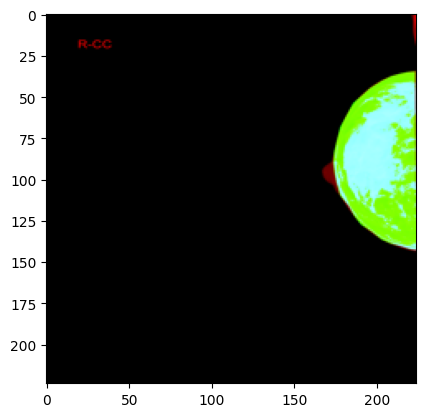

In [3]:
plt.imshow(X[0])

In [18]:
import tensorflow as tf
import numpy as np

# Load the .h5 model
model = tf.keras.models.load_model("C:\\Users\\91826\\OneDrive - SRM Institute of Science & Technology\\Desktop\\artender\\minor_project\\mammogram\\breast_cancer_model_mamogram.h5",compile=False)
prediction = model.predict(np.array([X[50]]))  # Use X[0] if you want the first sample's prediction

# Output the prediction
print("Prediction:",str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
Prediction: [[20.599524]]


In [25]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


base_dir = "C:\\Users\\91826\\OneDrive - SRM Institute of Science & Technology\\Desktop\\artender\\minor_project\\final_mammogram"
img_dir = os.path.join(base_dir, "images")
mask_dir = os.path.join(base_dir, "breast_mask")
dense_dir = os.path.join(base_dir, "dense_mask")

X=[]
img_size=(224,224)

img_path = os.path.join(img_dir,"1.jpg")
mask_path = os.path.join(mask_dir,'1.jpg')
dense_path = os.path.join(dense_dir,'1.jpg')
        
img = Image.open(img_path).convert('L').resize(img_size)
mask = Image.open(mask_path).convert('L').resize(img_size)
dense_mask = Image.open(dense_path).convert('L').resize(img_size)
        
   
img = np.array(img) / 255.0
mask = np.array(mask) / 255.0
dense_mask = np.array(dense_mask) / 255.0
        
       
combined = np.stack([img, mask, dense_mask], axis=-1)
        
      
X.append(combined)

In [26]:
import tensorflow as tf
import numpy as np

# Load the .h5 model
model = tf.keras.models.load_model("C:\\Users\\91826\\OneDrive - SRM Institute of Science & Technology\\Desktop\\artender\\minor_project\\mammogram\\breast_cancer_model_mamogram.h5",compile=False)
prediction = model.predict(np.array([X[0]]))  # Use X[0] if you want the first sample's prediction

# Output the prediction
print("Prediction:",str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
Prediction: [[49.178967]]
